In [1]:
import os
import yaml
import pandas as pd
from pyathena import connect
from pyathena.util import as_pandas
from sqlalchemy import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload

In [2]:
pg_cred = yaml.load(open("../conf/local/credentials.yml"), Loader=yaml.FullLoader)

In [3]:
url = 'postgresql://{}:{}@{}:{}/{}'
url = url.format(pg_cred["pg_user"], pg_cred["pg_pass"], pg_cred["pg_host"], 5432, "iefp")
con = create_engine(url, client_encoding='utf8')
meta = MetaData(bind=con, reflect=True)

/home/tobi_richter/iefp/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.
  after removing the cwd from sys.path.


## Get Pedidos Table

In [4]:
ped_cols= [
    'ano_mes',
    'data_movimento',
    'ute_id',
    'tipo_movimento',
    'categoria',
    "data_inscricao",
    "motivo_inscricao",
    "data_anulacao",
    "motivo_anulacao",
    "data_colocacao", 
    "data_desemprego",
    "plano_emprego",
    "data_elaboracao_ppe",
    "data_prim_candidatura",
    "data_subsidio",
    "data_ultima_saida",
]
table = 'pedidos'

In [5]:
%%time
sql = """
select {}
from {}
where "tipo_movimento" = 11
limit 10000
""".format(', '.join(ped_cols), "pedidos")

df = pd.read_sql(sql, con)
print(df.columns)

Index(['ano_mes', 'data_movimento', 'ute_id', 'tipo_movimento', 'categoria',
       'data_inscricao', 'motivo_inscricao', 'data_anulacao',
       'motivo_anulacao', 'data_colocacao', 'data_desemprego', 'plano_emprego',
       'data_elaboracao_ppe', 'data_prim_candidatura', 'data_subsidio',
       'data_ultima_saida'],
      dtype='object')
CPU times: user 71.5 ms, sys: 16.6 ms, total: 88.1 ms
Wall time: 13.2 s


## Distribution of reason for Signing up

In [6]:
cols = '*'
table = 'motivos_inscricao'
sql = """
select {}
from {}
""".format(', '.join(cols), table)
df_motivos_inscricao = pd.read_sql(sql, con)
df_motivos_inscricao

,cmotivo_inscricao,dmotivo_inscricao,ind_mot_insc,descricao,hmotivo_inscricao
0,26.0,REGRESSO A PORTUGAL,99.0,None,A
1,2.0,"FIM DE ESTUDOS, EX-ESTUDANTE",1.0,Ex-Estudante,A
2,1.0,"ESTUDANTE, TRABALHADOR ESTUDANTE",1.0,Ex-Estudante,A
3,3.0,FIM DE CURSO DE FORMAÇÃO,2.0,Fim de Formação,A
4,16.0,FIM DE ESTÁGIO PROFISSIONAL,2.0,Fim de Formação,A
5,5.0,FOI DESPEDIDO,3.0,Despedido,A
6,6.0,DESPEDIU-SE,4.0,Despediu-se,A
7,18.0,RESCISÃO POR SALÁRIOS EM ATRASO,4.0,Despediu-se,A
8,7.0,DESPEDIMENTO COM MÚTUO ACORDO,5.0,Mútuo Acordo,A
9,8.0,FIM DE TRABALHO NÃO PERMANENTE,6.0,Fim de trabalho não permanente,A


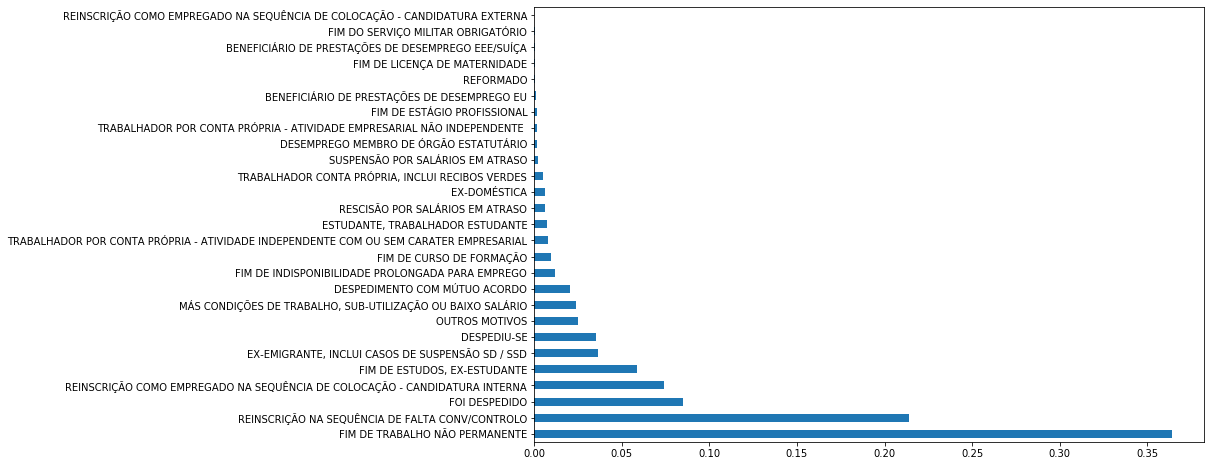

In [7]:
df_register = df.merge(df_motivos_inscricao, left_on="motivo_inscricao", right_on="cmotivo_inscricao")
hist = df_register["dmotivo_inscricao"].value_counts()/len(df_register)
hist.plot.barh(figsize=(12,8))

## Distribution of reason for cancelling registration

In [8]:
cols = '*'
table = 'motivos_anulacao'
sql = """
select {}
from {}
""".format(', '.join(cols), table)
df_motivos_anulacao = pd.read_sql(sql, con)

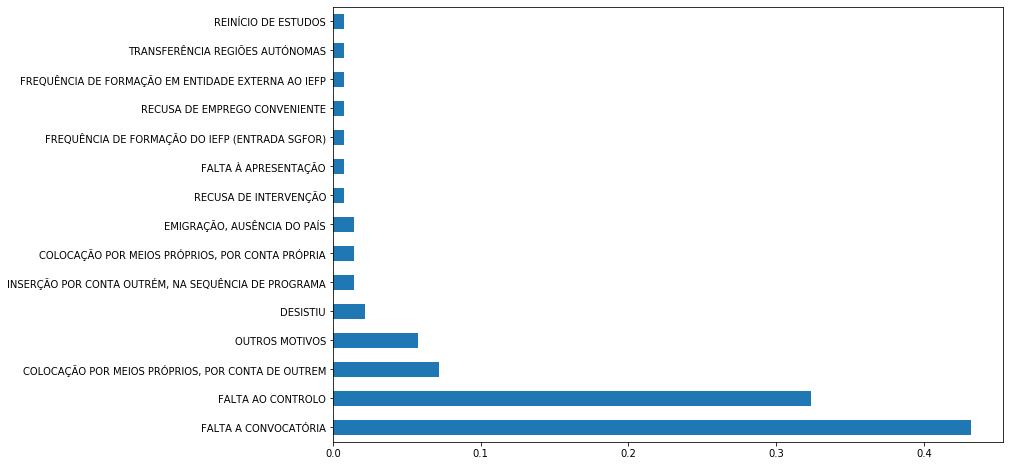

In [9]:
df_cancel = df.merge(df_motivos_anulacao, left_on="motivo_anulacao", right_on="cmotivo_anulacao")
hist = df_cancel["dmotivo_anulacao"].value_counts()/len(df_cancel)
hist.plot.barh(figsize=(12,8))

## Number of new Registers monthly

In [ ]:
%%time
sql = """
select ano_mes, count(ano_mes)
from pedidos
where tipo_movimento = 11
group by ano_mes
"""
df = pd.read_sql(sql, con)
df_registers = df.copy()

In [ ]:
df_registers["ano_mes"] = pd.to_datetime(df_registers["ano_mes"].astype("int").astype("str"), format="%Y%m")
df_registers.columns = ["Date", "Registrations"]
df_registers = df_registers.set_index("Date")
df_registers.plot(figsize=(12,8), title="Monthly new registers (Code 11)");

In [ ]:
%%time
sql = """
select ano_mes, count(ano_mes)
from pedidos
where "tipo_movimento" = 31
group by ano_mes
"""
df = pd.read_sql(sql, con)
df_cancellation = df.copy()

In [ ]:
df_cancellation["ano_mes"] = pd.to_datetime(df_cancellation["ano_mes"].astype("int").astype("str"), format="%Y%m")
df_cancellation.columns = ["Date", "Cancellations"]
df_cancellation = df_cancellation.set_index("Date")
df_cancellation.plot(figsize=(12,8), title="Monthly cancellations (Code 31)");

In [ ]:
df_merge = df_cancellation.merge(df_registers, left_index=True, right_index=True)
df_merge.plot(figsize=(12,8), title="Monthly registrations (11) vs. cancellations (31)")

In [ ]:
%%time
sql = """
select ano_mes, motivo_anulacao, count(*)
from pedidos
where "tipo_movimento" = 31
group by ano_mes, motivo_anulacao
"""
df = pd.read_sql(sql, con)

In [ ]:
df_cancellation_motives = df.copy()
df_cancellation_motives = df_cancellation_motives.pivot(index='motivo_anulacao', columns='ano_mes', values='count').reset_index()

In [ ]:
df_cancellation_motives

In [ ]:
df_cancellation_motives["ano_mes"] = pd.to_datetime(df_cancellation_motives["ano_mes"].astype("int").astype("str"), format="%Y%m")

In [ ]:
df_cancellation_motives